In [15]:
import pymysql
import matplotlib.pyplot as plt
import numpy as np
import operator

In [16]:
conn = pymysql.connect(host='localhost',db='kiva',user='ajy0714',password='dkswnsdud@3767',charset='utf8')
cursor = conn.cursor()

# 연/월별 펀딩 수

In [ ]:
sql = 'SELECT postedDate FROM loans2 ORDER BY postedDate ASC'
cursor.execute(sql)
result = cursor.fetchall()

In [ ]:
temp=[]
for data in result:
    temp.append(data[0][0:7])

In [ ]:
w_count = {}
for lst in temp:
    try: w_count[lst] += 1
    except: w_count[lst]=1
del w_count['']

In [ ]:
w_count_keys=list(w_count.keys())
w_count_values=list(w_count.values())
print(sum(w_count_values))

In [ ]:
plt.figure(figsize=(40,20))
plt.bar(w_count_keys, w_count_values)
plt.xticks(rotation=90)
plt.show()

# 국가별 펀딩 수

In [ ]:
sql = 'SELECT id, location_Country, postedDate, activity, sector FROM loans2 ORDER BY postedDate ASC'
cursor.execute(sql)
result = cursor.fetchall()

In [ ]:
temp=[]
for data in result:
    temp.append(data[1])

In [ ]:
w_count = {}
for lst in temp:
    try: w_count[lst] += 1
    except: w_count[lst]=1

In [ ]:
w_count_keys=list(w_count.keys())
w_count_values=list(w_count.values())

In [ ]:
dictionary = dict(zip(w_count_keys,w_count_values))
dictionary = dict(sorted(dictionary.items(), key=operator.itemgetter(1)))
w_count_keys=list(dictionary.keys())
w_count_values=list(dictionary.values())

In [ ]:
fig, ax = plt.subplots(figsize=(40,80))    
width = 0.5
ind = np.arange(len(w_count_values))  # the x locations for the groups
ax.barh(ind, w_count_values, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(w_count_keys,fontsize='20',minor=False)

for i, v in enumerate(w_count_values):
    ax.text(v + 5, i, str(v), color='green', fontweight='bold', fontsize='30')
    
plt.title('title')
plt.xlabel('x')
plt.ylabel('y')      
plt.show()
#plt.savefig(os.path.join('test.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

#  국가별 펀딩 수 변화

In [ ]:
sql = 'SELECT DISTINCT location_country FROM loans2'
cursor.execute(sql)
result = list(cursor.fetchall())

In [ ]:
list2=[]

for sector in result:
    sql = 'SELECT location_country, postedDate FROM loans2 WHERE location_country='+"'"+sector[0]+"' AND postedDate!='' ORDER BY location_country desc, postedDate ASC"
    cursor.execute(sql)
    result2 = list(cursor.fetchall())
    list2.append(result2);

In [ ]:
print(list2[0][0:5])

## Philippines

In [ ]:
Country1 = []
print(list2[48][0])
for i in list2[48]:
    Country1.append(i[1][0:7])
    
Country2 = {}
for lst in Country1:
    try: Country2[lst] += 1
    except: Country2[lst]=1

In [ ]:
Country2_keys=list(Country2.keys())
Country2_values=list(Country2.values())
print(Country2_values)
print(sum(Country2_values))

In [ ]:
plt.figure(figsize=(60,20))
plt.plot(Country2_keys, Country2_values, label='Country', color='black')
plt.legend(loc='upper left', fontsize=25)
plt.xticks(rotation=45)
plt.show()

## Kenya

In [ ]:
Kenya1 = []
for i in list2[2]:
    Kenya1.append(i[1][0:7])
    
Kenya2 = {}
for lst in Kenya1:
    try: Kenya2[lst] += 1
    except: Kenya2[lst]=1

In [ ]:
Kenya2_keys=list(Kenya2.keys())
Kenya2_values=list(Kenya2.values())
print(Kenya2_values)
print(sum(Kenya2_values))

In [ ]:
plt.figure(figsize=(60,20))
plt.plot(Kenya2_keys, Kenya2_values, label='Kenya', color='black')
plt.legend(loc='upper left', fontsize=25)
plt.xticks(rotation=45)
plt.show()

* 국가별로 펀딩을 처음 받기 시작할 때도 다를거고, 아예 펀딩이 안 올라왔을 경우들도 있을테니 검증할 필요가 있을 듯.(섹터 또한 마찬가지)
--> 기준 년도/월 데이터를 바탕으로 값이 없는 년도/달 같은 경우 0으로 채우게끔 하면 됨.

## Cambodia

In [ ]:
Cambodia1 = []

for i in list2[9]:
    Cambodia1.append(i[1][0:7])
    
Cambodia2 = {}
for lst in Cambodia1:
    try: Cambodia2[lst] += 1
    except: Cambodia2[lst]=1

In [ ]:
Cambodia2_keys=list(Cambodia2.keys())
Cambodia2_values=list(Cambodia2.values())
print(sum(Cambodia2_values))

In [ ]:
plt.figure(figsize=(60,20))
plt.plot(Cambodia2_keys, Cambodia2_values, label='Cambodia', color='Blue')
plt.legend(loc='upper left', fontsize=25)
plt.xticks(rotation=45)
plt.show()

## Peru

In [ ]:
Peru1 = []

for i in list2[37]:
    Peru1.append(i[1][0:7])
    
Peru2 = {}
for lst in Peru1:
    try: Peru2[lst] += 1
    except: Peru2[lst]=1

In [ ]:
Peru2_keys=list(Peru2.keys())
Peru2_values=list(Peru2.values())

In [ ]:
plt.figure(figsize=(60,20))
plt.plot(Peru2_keys, Peru2_values, label='Peru', color='Blue')
plt.legend(loc='upper left', fontsize=25)
plt.xticks(rotation=45)
plt.show()

# 섹터, 년도별 펀딩 수 변화

In [ ]:
sql = 'SELECT DISTINCT sector FROM loans2'
cursor.execute(sql)
result = list(cursor.fetchall())

In [ ]:
list2=[]

for sector in result:
    sql = 'SELECT sector, postedDate FROM loans2 WHERE sector='+"'"+sector[0]+"' AND postedDate!='' ORDER BY sector desc, postedDate ASC"
    cursor.execute(sql)
    result2 = list(cursor.fetchall())
    list2.append(result2);

In [ ]:
Food1=[]
Agriculture1=[]
Clothing1=[]
Construction1=[]
Health1=[]
Services1=[]
Retail1=[]
Arts1=[]
Housing1=[]
Transportation1=[]
Manufacturing1=[]
Entertainment1=[]
Wholesale1=[]
Education1=[]
Personal_Use1=[]

Food2={}
Agriculture2={}
Clothing2={}
Construction2={}
Health2={}
Services2={}
Retail2={}
Arts2={}
Housing2={}
Transportation2={}
Manufacturing2={}
Entertainment2={}
Wholesale2={}
Education2={}
Personal_Use2={}

print(Entertainment1)

for i in list2[0]:
    Food1.append(i[1][0:7])
    
for lst in Food1:
    try: Food2[lst] += 1
    except: Food2[lst]=1
        
Food2_keys=list(Food2.keys())
Food2_values=list(Food2.values())

for i in list2[1]:
    Agriculture1.append(i[1][0:7])
    
for lst in Agriculture1:
    try: Agriculture2[lst] += 1
    except: Agriculture2[lst]=1
        
Agriculture2_keys=list(Agriculture2.keys())
Agriculture2_values=list(Agriculture2.values())

for i in list2[2]:
    Clothing1.append(i[1][0:7])
    
for lst in Clothing1:
    try: Clothing2[lst] += 1
    except: Clothing2[lst]=1
        
Clothing2_keys=list(Clothing2.keys())
Clothing2_values=list(Clothing2.values())

for i in list2[3]:
    Construction1.append(i[1][0:7])
    
for lst in Construction1:
    try: Construction2[lst] += 1
    except: Construction2[lst]=1
        
Construction2_keys=list(Construction2.keys())
Construction2_values=list(Construction2.values())

for i in list2[4]:
    Health1.append(i[1][0:7])

for lst in Health1:
    try: Health2[lst] += 1
    except: Health2[lst]=1
        
Health2_keys=list(Health2.keys())
Health2_values=list(Health2.values())

for i in list2[5]:
    Services1.append(i[1][0:7])
    
for lst in Services1:
    try: Services2[lst] += 1
    except: Services2[lst]=1
        
Services2_keys=list(Services2.keys())
Services2_values=list(Services2.values())

for i in list2[6]:
    Retail1.append(i[1][0:7])
    
for lst in Retail1:
    try: Retail2[lst] += 1
    except: Retail2[lst]=1
        
Retail2_keys=list(Retail2.keys())
Retail2_values=list(Retail2.values())

for i in list2[7]:
    Arts1.append(i[1][0:7])
    
for lst in Arts1:
    try: Arts2[lst] += 1
    except: Arts2[lst]=1
        
Arts2_keys=list(Arts2.keys())
Arts2_values=list(Arts2.values())

for i in list2[8]:
    Housing1.append(i[1][0:7])
    
for lst in Housing1:
    try: Housing2[lst] += 1
    except: Housing2[lst]=1
        
Housing2_keys=list(Housing2.keys())
Housing2_values=list(Housing2.values())

for i in list2[9]:
    Transportation1.append(i[1][0:7])
    
for lst in Transportation1:
    try: Transportation2[lst] += 1
    except: Transportation2[lst]=1
        
Transportation2_keys=list(Transportation2.keys())
Transportation2_values=list(Transportation2.values())

for i in list2[10]:
    Manufacturing1.append(i[1][0:7])
    
for lst in Manufacturing1:
    try: Manufacturing2[lst] += 1
    except: Manufacturing2[lst]=1
        
Manufacturing2_keys=list(Manufacturing2.keys())
Manufacturing2_values=list(Manufacturing2.values())


#print(Entertainment1)
for i in list2[11]:
    #print(i)
    Entertainment1.append(i[1][0:7])
    
for lst in Entertainment1:
    try: Entertainment2[lst] += 1
    except: Entertainment2[lst]=1
        
Entertainment2_keys=list(Entertainment2.keys())
Entertainment2_values=list(Entertainment2.values())

#print(Entertainment2_keys)
#print(Entertainment2_values)

for i in list2[12]:
    Wholesale1.append(i[1][0:7])
    
for lst in Wholesale1:
    try: Wholesale2[lst] += 1
    except: Wholesale2[lst]=1
        
Wholesale2_keys=list(Wholesale2.keys())
Wholesale2_values=list(Wholesale2.values())

for i in list2[13]:
    Education1.append(i[1][0:7])
    
for lst in Education1:
    try: Education2[lst] += 1
    except: Education2[lst]=1
        
Education2_keys=list(Education2.keys())
Education2_values=list(Education2.values())

for i in list2[14]:
    Personal_Use1.append(i[1][0:7])
    
for lst in Personal_Use1:
    try: Personal_Use2[lst] += 1
    except: Personal_Use2[lst]=1
        
Personal_Use2_keys=list(Personal_Use2.keys())
Personal_Use2_values=list(Personal_Use2.values())

In [ ]:
plt.figure(figsize=(60,20))
plt.plot(Food2_keys, Food2_values, label='Food', color='black')
plt.plot(Agriculture2_keys, Agriculture2_values, label='Agriculture', color='red')
plt.plot(Clothing2_keys, Clothing2_values, label='Clothing', color='orange')
plt.plot(Construction2_keys, Construction2_values, label='Construction', color='yellow')
plt.plot(Health2_keys, Health2_values, label='Health', color='green')
plt.plot(Services2_keys, Services2_values, label='Services', color='blue')
plt.plot(Retail2_keys, Retail2_values, label='Retail', color='purple')
plt.plot(Arts2_keys, Arts2_values, label='Arts', color='lime')
plt.plot(Housing2_keys, Housing2_values, label='Housing', color='darkolivegreen')
plt.plot(Transportation2_keys, Transportation2_values, label='Transportation', color='silver')
plt.plot(Manufacturing2_keys, Manufacturing2_values, label='Manufacturing', color='skyblue')
plt.plot(Entertainment2_keys, Entertainment2_values, label='Entertainment', color='fuchsia')
plt.plot(Wholesale2_keys, Wholesale2_values, label='Wholesale', color='navy')
plt.plot(Education2_keys, Education2_values, label='Education')
plt.plot(Personal_Use2_keys, Personal_Use2_values, label='Personal_Use',color='grey')
plt.legend(loc='upper left', fontsize=25)
plt.xticks(rotation=45)
plt.show()

# 필리핀 카테고리별 변화

In [17]:
sql = 'SELECT DISTINCT sector FROM loans2'
cursor.execute(sql)
result = list(cursor.fetchall())

In [18]:
list2=[]
#print(result)
for sector in result:
    print(sector[0])
    sql = "SELECT sector, postedDate FROM loans2 WHERE location_country='Philippines' AND sector="+"'"+sector[0]+"' AND postedDate!='' ORDER BY sector desc, postedDate ASC"
    print(sql)
    cursor.execute(sql)
    result2 = list(cursor.fetchall())
    list2.append(result2);   

Food
SELECT sector, postedDate FROM loans2 WHERE location_country='Philippines' AND sector='Food' AND postedDate!='' ORDER BY sector desc, postedDate ASC
Agriculture
SELECT sector, postedDate FROM loans2 WHERE location_country='Philippines' AND sector='Agriculture' AND postedDate!='' ORDER BY sector desc, postedDate ASC
Clothing
SELECT sector, postedDate FROM loans2 WHERE location_country='Philippines' AND sector='Clothing' AND postedDate!='' ORDER BY sector desc, postedDate ASC
Construction
SELECT sector, postedDate FROM loans2 WHERE location_country='Philippines' AND sector='Construction' AND postedDate!='' ORDER BY sector desc, postedDate ASC
Health
SELECT sector, postedDate FROM loans2 WHERE location_country='Philippines' AND sector='Health' AND postedDate!='' ORDER BY sector desc, postedDate ASC
Services
SELECT sector, postedDate FROM loans2 WHERE location_country='Philippines' AND sector='Services' AND postedDate!='' ORDER BY sector desc, postedDate ASC
Retail
SELECT sector, post

In [24]:
Food1=[]
Agriculture1=[]
Clothing1=[]
Construction1=[]
Health1=[]
Services1=[]
Retail1=[]
Arts1=[]
Housing1=[]
Transportation1=[]
Manufacturing1=[]
Entertainment1=[]
Wholesale1=[]
Education1=[]
Personal_Use1=[]

Food2={}
Agriculture2={}
Clothing2={}
Construction2={}
Health2={}
Services2={}
Retail2={}
Arts2={}
Housing2={}
Transportation2={}
Manufacturing2={}
Entertainment2={}
Wholesale2={}
Education2={}
Personal_Use2={}

for i in list2[0]:
    Food1.append(i[1][0:7])
    
for lst in Food1:
    try: Food2[lst] += 1
    except: Food2[lst]=1
        
Food2_keys=list(Food2.keys())
Food2_values=list(Food2.values())

for i in list2[1]:
    Agriculture1.append(i[1][0:7])
    
for lst in Agriculture1:
    try: Agriculture2[lst] += 1
    except: Agriculture2[lst]=1
        
Agriculture2_keys=list(Agriculture2.keys())
Agriculture2_values=list(Agriculture2.values())

for i in list2[2]:
    Clothing1.append(i[1][0:7])
    
for lst in Clothing1:
    try: Clothing2[lst] += 1
    except: Clothing2[lst]=1
        
Clothing2_keys=list(Clothing2.keys())
Clothing2_values=list(Clothing2.values())

for i in list2[3]:
    Construction1.append(i[1][0:7])
    
for lst in Construction1:
    try: Construction2[lst] += 1
    except: Construction2[lst]=1
        
Construction2_keys=list(Construction2.keys())
Construction2_values=list(Construction2.values())

for i in list2[4]:
    Health1.append(i[1][0:7])

for lst in Health1:
    try: Health2[lst] += 1
    except: Health2[lst]=1
        
Health2_keys=list(Health2.keys())
Health2_values=list(Health2.values())

for i in list2[5]:
    Services1.append(i[1][0:7])
    
for lst in Services1:
    try: Services2[lst] += 1
    except: Services2[lst]=1
        
Services2_keys=list(Services2.keys())
Services2_values=list(Services2.values())

for i in list2[6]:
    Retail1.append(i[1][0:7])
    
for lst in Retail1:
    try: Retail2[lst] += 1
    except: Retail2[lst]=1
        
Retail2_keys=list(Retail2.keys())
Retail2_values=list(Retail2.values())

for i in list2[7]:
    Arts1.append(i[1][0:7])
    
for lst in Arts1:
    try: Arts2[lst] += 1
    except: Arts2[lst]=1
        
Arts2_keys=list(Arts2.keys())
Arts2_values=list(Arts2.values())

for i in list2[8]:
    Housing1.append(i[1][0:7])
    
for lst in Housing1:
    try: Housing2[lst] += 1
    except: Housing2[lst]=1
        
Housing2_keys=list(Housing2.keys())
Housing2_values=list(Housing2.values())

for i in list2[9]:
    Transportation1.append(i[1][0:7])
    
for lst in Transportation1:
    try: Transportation2[lst] += 1
    except: Transportation2[lst]=1
        
Transportation2_keys=list(Transportation2.keys())
Transportation2_values=list(Transportation2.values())

for i in list2[10]:
    Manufacturing1.append(i[1][0:7])
    
for lst in Manufacturing1:
    try: Manufacturing2[lst] += 1
    except: Manufacturing2[lst]=1
        
Manufacturing2_keys=list(Manufacturing2.keys())
Manufacturing2_values=list(Manufacturing2.values())

for i in list2[11]:
    Entertainment1.append(i[1][0:7])
    
for lst in Entertainment1:
    try: Entertainment2[lst] += 1
    except: Entertainment2[lst]=1
        
Entertainment2_keys=list(Entertainment2.keys())
Entertainment2_values=list(Entertainment2.values())

for i in list2[12]:
    Wholesale1.append(i[1][0:7])
    
for lst in Wholesale1:
    try: Wholesale2[lst] += 1
    except: Wholesale2[lst]=1
        
Wholesale2_keys=list(Wholesale2.keys())
Wholesale2_values=list(Wholesale2.values())

for i in list2[13]:
    Education1.append(i[1][0:7])
    
for lst in Education1:
    try: Education2[lst] += 1
    except: Education2[lst]=1
        
Education2_keys=list(Education2.keys())
Education2_values=list(Education2.values())

for i in list2[14]:
    Personal_Use1.append(i[1][0:7])
    
for lst in Personal_Use1:
    try: Personal_Use2[lst] += 1
    except: Personal_Use2[lst]=1
        
Personal_Use2_keys=list(Personal_Use2.keys())
Personal_Use2_values=list(Personal_Use2.values())

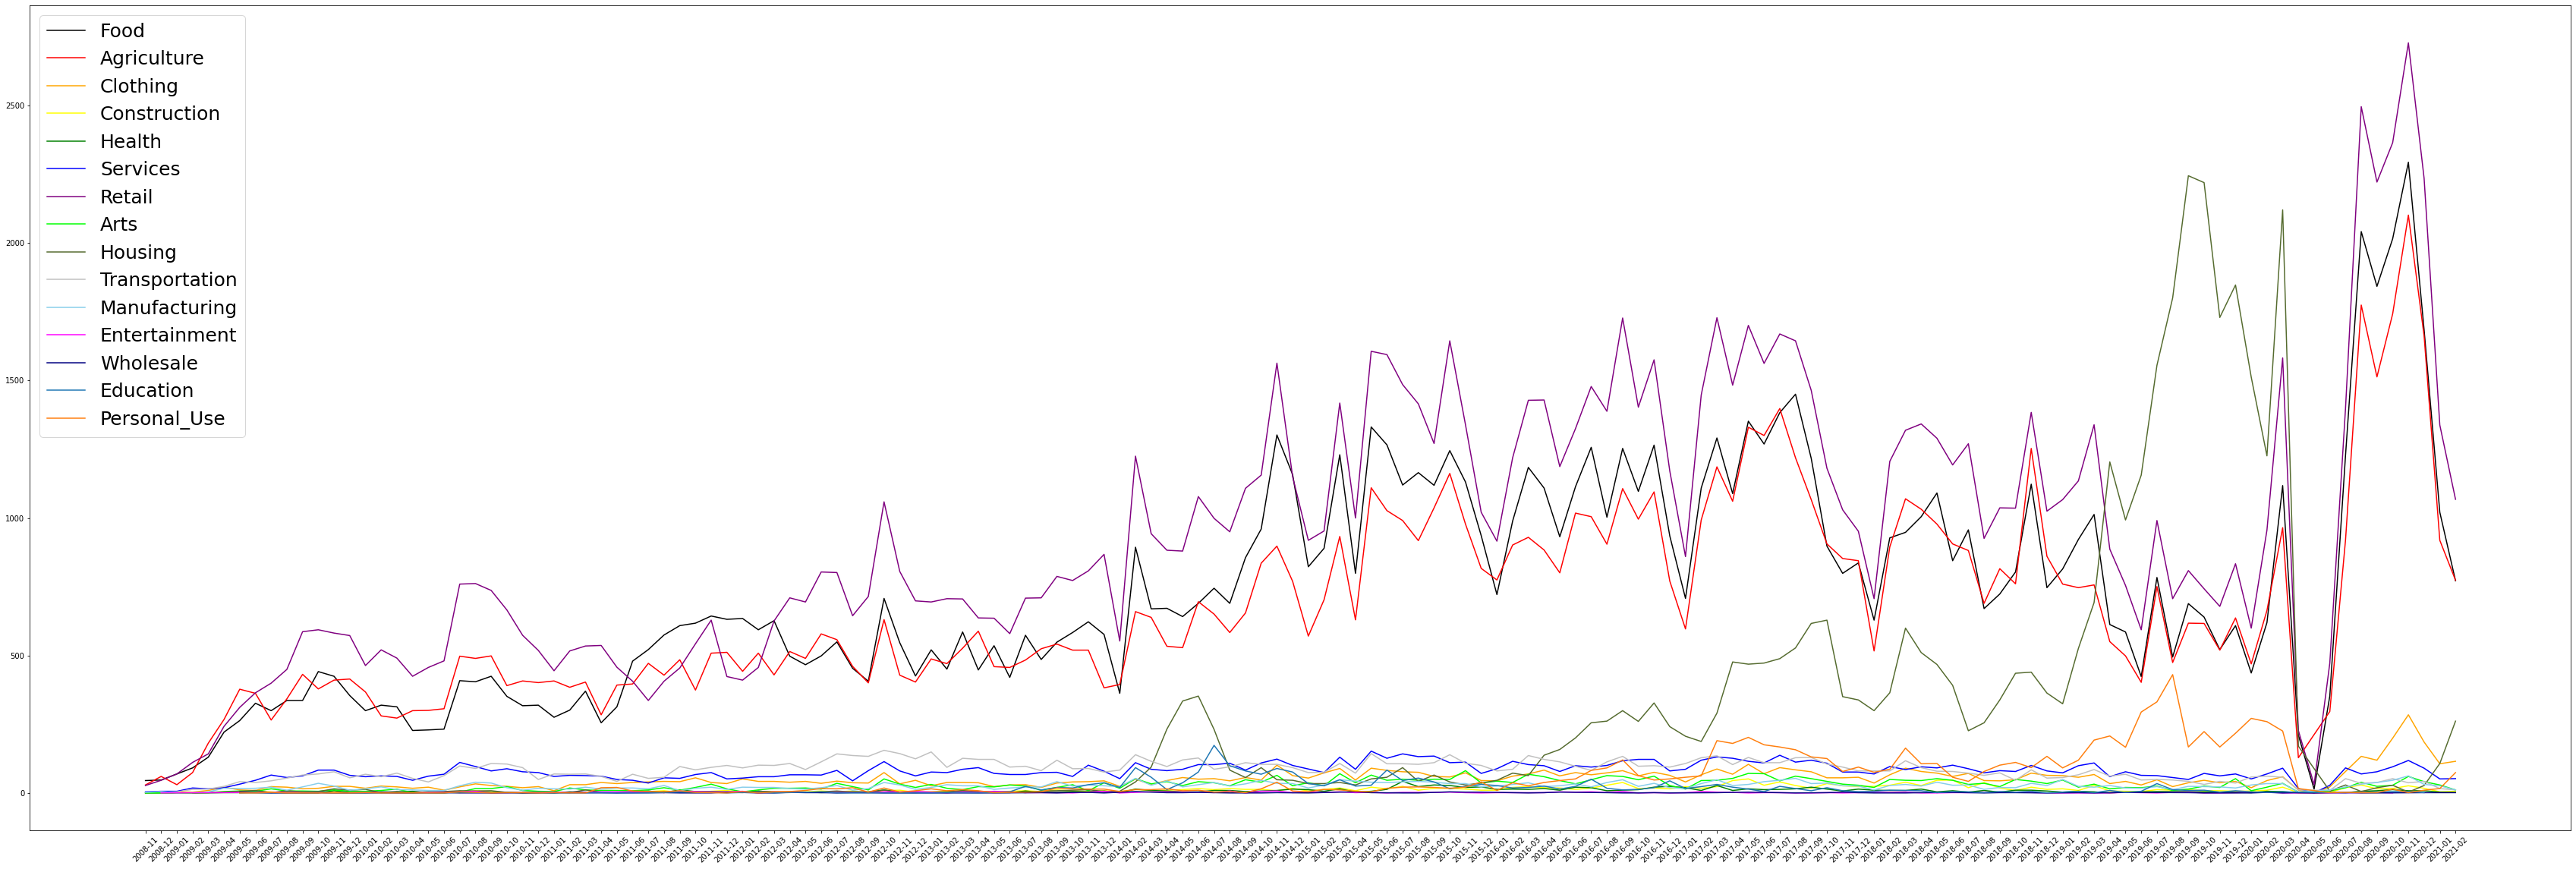

In [25]:
plt.figure(figsize=(60,20))
plt.plot(Food2_keys, Food2_values, label='Food', color='black')
plt.plot(Agriculture2_keys, Agriculture2_values, label='Agriculture', color='red')
plt.plot(Clothing2_keys, Clothing2_values, label='Clothing', color='orange')
plt.plot(Construction2_keys, Construction2_values, label='Construction', color='yellow')
plt.plot(Health2_keys, Health2_values, label='Health', color='green')
plt.plot(Services2_keys, Services2_values, label='Services', color='blue')
plt.plot(Retail2_keys, Retail2_values, label='Retail', color='purple')
plt.plot(Arts2_keys, Arts2_values, label='Arts', color='lime')
plt.plot(Housing2_keys, Housing2_values, label='Housing', color='darkolivegreen')
plt.plot(Transportation2_keys, Transportation2_values, label='Transportation', color='silver')
plt.plot(Manufacturing2_keys, Manufacturing2_values, label='Manufacturing', color='skyblue')
plt.plot(Entertainment2_keys, Entertainment2_values, label='Entertainment', color='fuchsia')
plt.plot(Wholesale2_keys, Wholesale2_values, label='Wholesale', color='navy')
plt.plot(Education2_keys, Education2_values, label='Education')
plt.plot(Personal_Use2_keys, Personal_Use2_values, label='Personal_Use')
plt.legend(loc='upper left', fontsize=25)
plt.xticks(rotation=45)
plt.show()